In [ ]:
pip install opencv-python


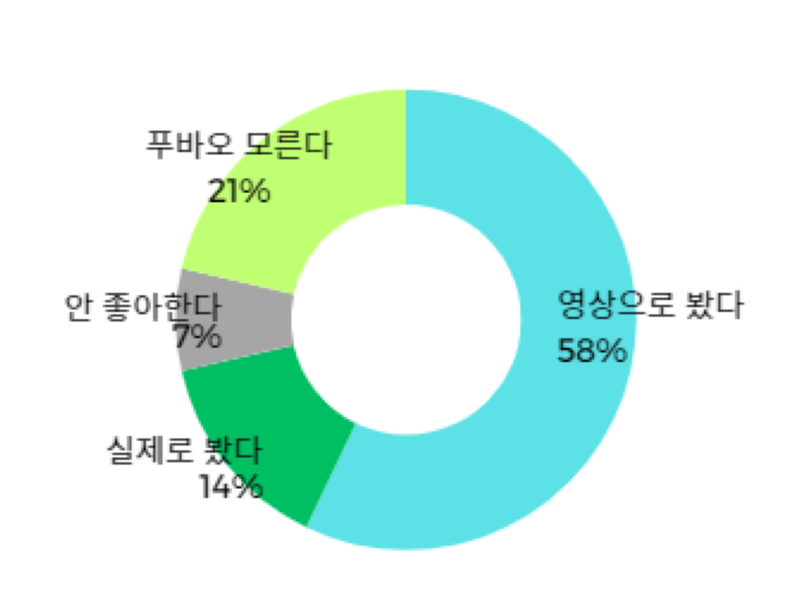

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_path = '1.png'  # 업로드한 이미지 파일 경로
image = cv2.imread(image_path)

# 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이진화 이미지 얻기
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# 윤곽선 찾기
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 도넛 그래프 윤곽선 필터링 함수
def is_donut_contour(contour):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    if area == 0:
        return False
    circularity = (4 * np.pi * area) / (perimeter * perimeter)
    return 0.7 < circularity < 1.3 and 500 < area < 2000

# 이미지에 윤곽선 그리기
contour_image = image.copy()
external_contours = []
internal_contours = []

for contour in contours:
    if is_donut_contour(contour):
        external_contours.append(contour)

# 도넛 그래프 내부 윤곽선 찾기
for contour in external_contours:
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [contour], -1, 255, -1)
    internal_thresh = cv2.bitwise_and(thresh, thresh, mask=mask)
    internal_contours_found, _ = cv2.findContours(internal_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for internal_contour in internal_contours_found:
        if is_donut_contour(internal_contour):
            internal_contours.append(internal_contour)

# 윤곽선을 빨간색으로 그림
cv2.drawContours(contour_image, external_contours, -1, (0, 0, 255), 2)
cv2.drawContours(contour_image, internal_contours, -1, (0, 0, 255), 2)

# 결과 이미지 출력 (축 없이)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 13.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [ ]:
!pip install pytesseract opencv-python matplotlib


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48420 (\N{HANGUL SYLLABLE BWASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

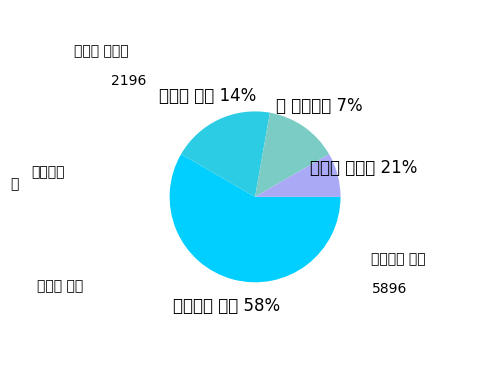

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import easyocr

# EasyOCR 리더 생성 (한글 지원)
reader = easyocr.Reader(['ko'])

# 이미지를 읽어옵니다
image_path = 'test.png'
image = cv2.imread(image_path)

# 이미지를 RGB로 변환합니다 (OpenCV는 기본적으로 BGR로 읽어옵니다)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 그레이스케일로 변환합니다
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# 원을 검출합니다 (허프 변환 사용)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
                           param1=50, param2=30, minRadius=100, maxRadius=200)

# 한글 텍스트 인식 (OCR)
results = reader.readtext(image_rgb)

# 첫 번째 원을 선택합니다 (가장 큰 원)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    x, y, r = circles[0]

    # 원형 차트를 그릴 위치
    theta1 = [0, 210, 280, 330]  # 시작 각도
    theta2 = [210, 280, 330, 360]  # 끝 각도

    # 원형 차트 데이터
    sizes = [58, 14, 7, 21]
    labels = ['영상으로 봤다', '실제로 봤다', '안 좋아한다', '푸바오 모른다']
    colors = ['#00CFFF', '#2CCCE4', '#7BCCC4', '#A9A9F5']

    # 새로운 이미지 생성
    new_image = np.ones_like(image_rgb) * 255

    fig, ax = plt.subplots()
    ax.imshow(new_image)

    # 원형 차트 그리기
    for i in range(len(sizes)):
        wedge = Wedge(center=(x, y), r=r, theta1=theta1[i], theta2=theta2[i], facecolor=colors[i])
        ax.add_patch(wedge)
        # 각 항목의 중심 각도 계산
        angle = (theta1[i] + theta2[i]) / 2
        rad = np.deg2rad(angle)
        # 라벨 위치 계산
        label_x = x + (r + 40) * np.cos(rad)
        label_y = y + (r + 40) * np.sin(rad)
        ax.text(label_x, label_y, f"{labels[i]} {sizes[i]}%", ha='center', va='center', fontsize=12)

    # OCR로 인식된 한글 텍스트를 동일한 위치에 배치
    for (bbox, text, conf) in results:
        if conf > 0.6:  # 인식 신뢰도가 60% 이상인 텍스트만 사용
            (tl, tr, br, bl) = bbox  # bbox 좌표
            text_x, text_y = int(tl[0]), int(tl[1])
            ax.text(text_x, text_y, text, ha='left', va='top', fontsize=10, color='black')

    ax.set_xlim(0, new_image.shape[1])
    ax.set_ylim(new_image.shape[0], 0)
    ax.axis('off')

    plt.show()
else:
    print("원 검출 실패: 원을 찾을 수 없습니다.")
